# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [36]:
#!pip install

In [190]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [191]:
import sklearn

In [192]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scikitplot.metrics import plot_roc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import ConvergenceWarning
from sklearn.decomposition import PCA
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [193]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,118,85,43,64,128,56,8,150,46,19,144,168,324,173,82,9,14,180,184
1,523,90,43,81,231,97,46,150,45,19,149,200,332,164,91,5,9,186,196
2,369,89,47,81,156,57,8,161,41,20,149,187,388,197,72,9,15,187,193
3,600,98,46,77,199,71,7,166,39,20,150,184,422,180,69,13,9,200,203
4,0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197
5,456,92,43,70,124,52,6,139,49,18,144,164,282,172,79,4,16,183,185
6,95,97,50,108,211,65,10,214,31,24,156,232,683,218,72,7,29,188,197
7,845,85,36,66,123,55,5,120,56,17,128,140,212,131,73,1,18,186,190
8,651,85,40,66,136,58,6,142,48,19,137,164,295,164,77,2,22,182,186
9,544,88,43,70,177,74,19,152,44,19,143,180,342,168,76,1,9,186,189


Methods `describe` and `info` deliver some useful information.

In [194]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,435.839709,93.816029,45.127505,82.451730,169.684882,61.786885,8.597450,169.846995,40.788707,20.664845,148.619308,189.595628,445.744991,176.225865,72.553734,6.380692,12.398907,188.797814,195.449909
std,242.394901,8.144948,6.310846,15.686247,33.497753,7.664982,4.588552,34.189125,7.955567,2.667844,14.684855,32.007989,182.567767,33.590220,7.198903,4.875351,8.908050,6.010720,7.294367
min,0.000000,76.000000,33.000000,40.000000,109.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,61.000000,0.000000,0.000000,176.000000,181.000000
25%,226.000000,87.000000,40.000000,70.000000,142.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,168.000000,318.000000,149.000000,67.000000,2.000000,5.000000,185.000000,191.000000
50%,444.000000,93.000000,45.000000,80.000000,169.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,365.000000,175.000000,72.000000,6.000000,11.000000,188.000000,197.000000
75%,652.000000,100.000000,51.000000,98.000000,195.000000,65.000000,10.000000,201.000000,46.000000,23.000000,161.000000,218.000000,600.000000,201.000000,76.000000,10.000000,19.000000,193.000000,201.000000
max,845.000000,117.000000,59.000000,110.000000,322.000000,133.000000,55.000000,262.000000,61.000000,28.000000,188.000000,287.000000,998.000000,268.000000,127.000000,22.000000,40.000000,206.000000,211.000000


In [195]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int32
 1   1       549 non-null    int32
 2   2       549 non-null    int32
 3   3       549 non-null    int32
 4   4       549 non-null    int32
 5   5       549 non-null    int32
 6   6       549 non-null    int32
 7   7       549 non-null    int32
 8   8       549 non-null    int32
 9   9       549 non-null    int32
 10  10      549 non-null    int32
 11  11      549 non-null    int32
 12  12      549 non-null    int32
 13  13      549 non-null    int32
 14  14      549 non-null    int32
 15  15      549 non-null    int32
 16  16      549 non-null    int32
 17  17      549 non-null    int32
 18  18      549 non-null    int32
dtypes: int32(19)
memory usage: 40.9 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [196]:
### YOUR CODE HERE
for class_n in np.unique(y_train):
    print("Num of", class_n, ":", (y_train == class_n).sum())

Num of bus : 141
Num of opel : 150
Num of saab : 122
Num of van : 136


#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [197]:
#!pip install scikit-plot

In [198]:
params_grid = {
    "penalty": ["l1", "l2"],
    "C": [0.1, 1, 5, 10]
}
model = LogisticRegression(solver='saga', max_iter=500, tol=1e-3, multi_class='multinomial')
grid_search = GridSearchCV(model, params_grid, refit=True)
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    grid_search.fit(X_train, y_train)

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

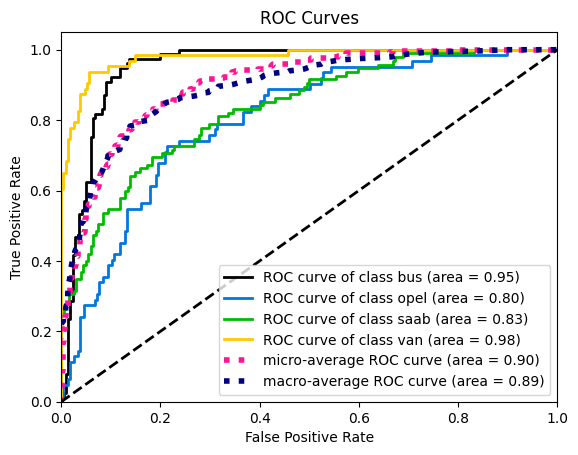

In [199]:
y_pred = grid_search.best_estimator_.predict_proba(X_test)
plot_roc(y_test, y_pred)

In [200]:
y_pred = grid_search.best_estimator_.predict(X_test)
print(f1_score(y_test, y_pred, average="macro"),  accuracy_score(y_test, y_pred))

0.6881690470951757 0.696969696969697


#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot.

In [201]:
X_train_pca

array([[-1.06202889, -0.73004889,  1.1425781 , ..., -0.1325714 ,
         0.10757383,  0.01079982],
       [-1.4068402 ,  0.14316891, -0.48561482, ...,  0.02000534,
        -0.01491137, -0.03487231],
       [-1.77038566,  0.49493902,  0.86236382, ..., -0.13409004,
        -0.16133036, -0.02255266],
       ...,
       [-2.14402313,  1.58462702,  1.37827278, ..., -0.03563023,
        -0.01033867,  0.01811285],
       [-2.7331311 ,  3.42462988,  0.36494542, ...,  0.22911951,
         0.04320817,  0.01523121],
       [ 3.0789473 , -0.18595671,  0.21926073, ..., -0.12814319,
         0.08917053,  0.01370085]])

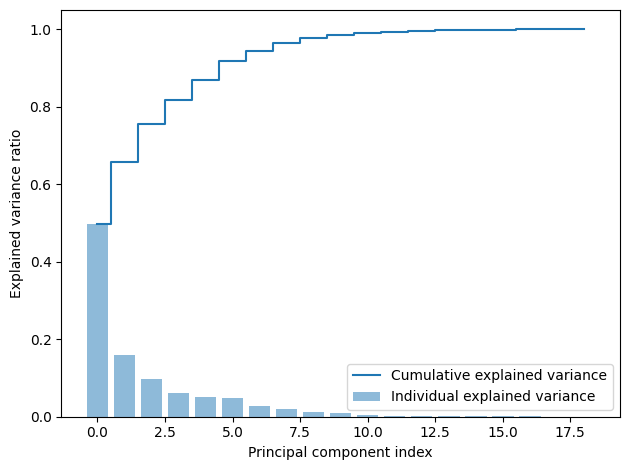

In [202]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


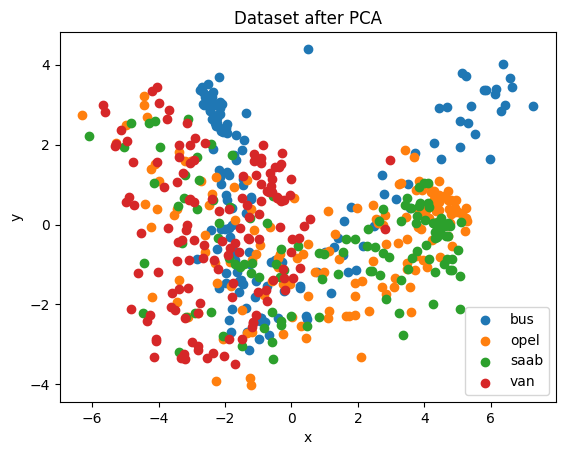

In [203]:

plt.title("Dataset after PCA")
for class_name in np.unique(y_train):
    indeces = (y_train == class_name)
    plt.scatter(X_train_pca[indeces,0], X_train_pca[indeces,1], label=class_name)

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [204]:
# YOUR CODE HERE
n_features = X_train.shape[1]
pca = PCA()
pca.fit(X_train)

PCA()

In [205]:
explained_var = pca.explained_variance_ratio_
explained_var_cumsum = np.cumsum(explained_var)
explained_var

array([6.04537022e-01, 3.80578879e-01, 6.54358067e-03, 4.43542591e-03,
       1.34805462e-03, 7.53330320e-04, 4.87631607e-04, 4.28402754e-04,
       2.73748368e-04, 2.28194835e-04, 1.25021337e-04, 9.85656740e-05,
       6.31091930e-05, 4.79893536e-05, 2.45453366e-05, 1.60850526e-05,
       7.23972987e-06, 2.47213011e-06, 7.02490994e-07])

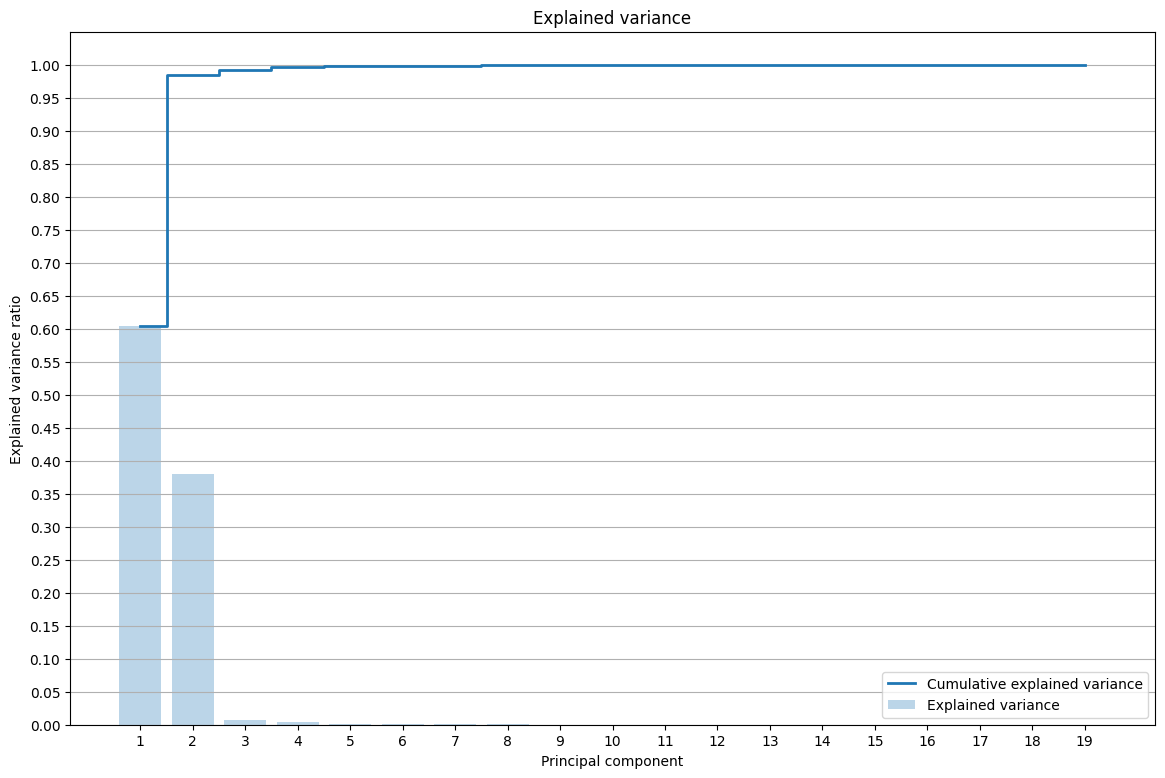

In [206]:
plt.figure(figsize=(14, 9))
plt.title("Explained variance")
plt.bar(range(1, n_features + 1), pca.explained_variance_ratio_, alpha=0.3, align="center", label="Explained variance")
plt.step(range(1, n_features + 1), explained_var_cumsum, label="Cumulative explained variance", linewidth=2, where="mid")
plt.xticks(range(1, n_features + 1))
plt.yticks(np.arange(0, 1.01, 0.05))
plt.xlabel("Principal component")
plt.ylabel("Explained variance ratio")
plt.grid(axis="y")
plt.legend()
plt.show()

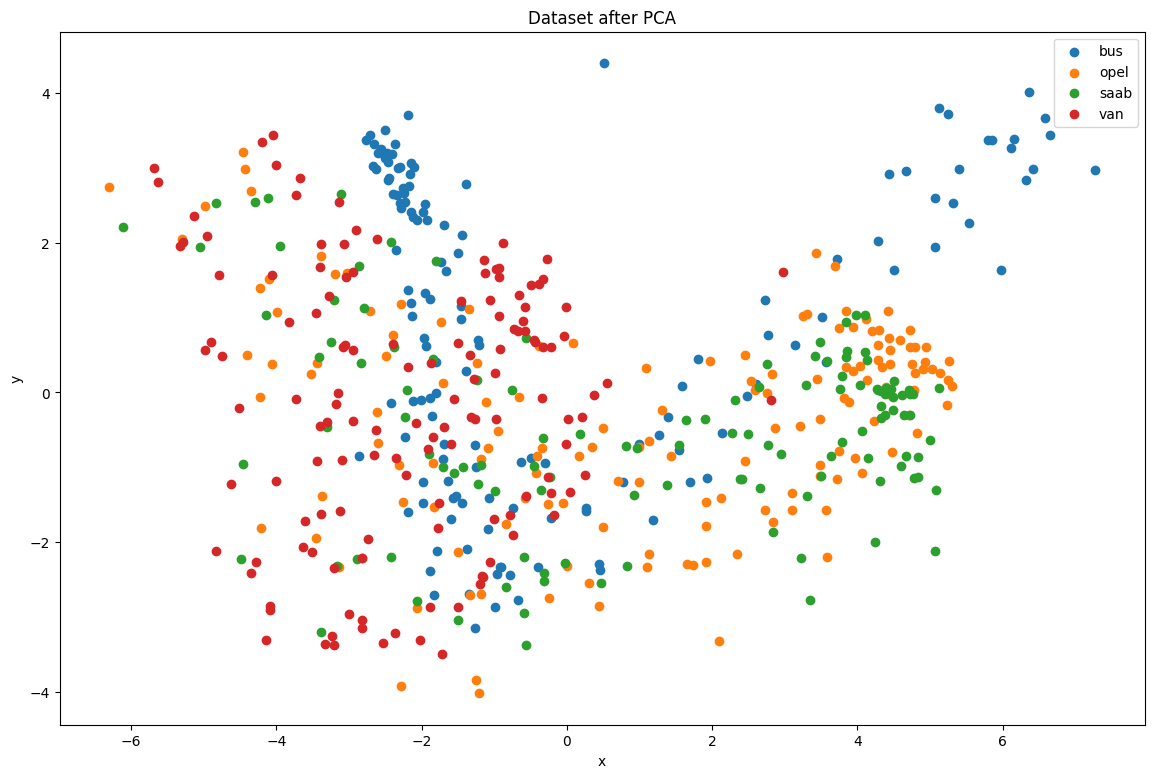

In [207]:
X_pca = Pipeline([
    ("Scale", StandardScaler()),
    ("PCA", PCA(n_components=0.95)),
]).fit_transform(X_train)

plt.figure(figsize=(14, 9))
plt.title("Dataset after PCA")
for class_name in np.unique(y_train):
    indeces = (y_train == class_name)
    plt.scatter(X_pca[indeces,0], X_pca[indeces,1], label=class_name)

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [208]:
X_pca

array([[-2.39508332,  2.65180499, -0.01246972, ...,  1.31892785,
        -0.03248043, -0.20075047],
       [ 0.54669137,  0.12955525,  9.27321939, ...,  1.20373152,
        -1.08306024,  2.19431493],
       [-0.3772546 ,  0.62615017, -0.52446781, ...,  0.65592337,
        -0.46633898, -0.57088045],
       ...,
       [-0.21574732, -1.67303375,  0.37057645, ..., -0.47453798,
         0.81512516, -0.76960588],
       [ 1.00062286, -0.72581092, -0.02799679, ..., -0.05067064,
        -0.11656049, -1.06016066],
       [-1.07509067, -1.40372153,  0.36899247, ...,  0.17649673,
         0.48377962, -0.69941797]])

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [209]:
### YOUR CODE HERE
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.fit_transform(X_test_std)
X_test_pca.shape

(297, 19)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [210]:
params_grid = {
    "penalty": ["l1", "l2"],
    "C": [0.1, 1, 5, 10]
}
model = LogisticRegression(solver='saga', max_iter=1000, tol=1e-3, multi_class='multinomial')
grid_search = GridSearchCV(model, params_grid, refit=True)
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    grid_search.fit(X_train_pca, y_train)

In [211]:
lr_params = grid_search.best_params_

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

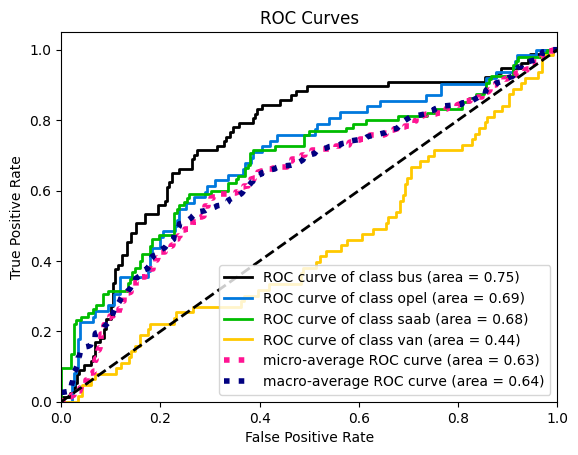

In [212]:
y_pred = grid_search.best_estimator_.predict_proba(X_test_pca)
plot_roc(y_test, y_pred)

In [213]:
y_pred = grid_search.best_estimator_.predict(X_test)
print(f1_score(y_test, y_pred, average="macro"),  accuracy_score(y_test, y_pred))

0.08635097493036212 0.20875420875420875


#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

{'max_depth': 8}


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

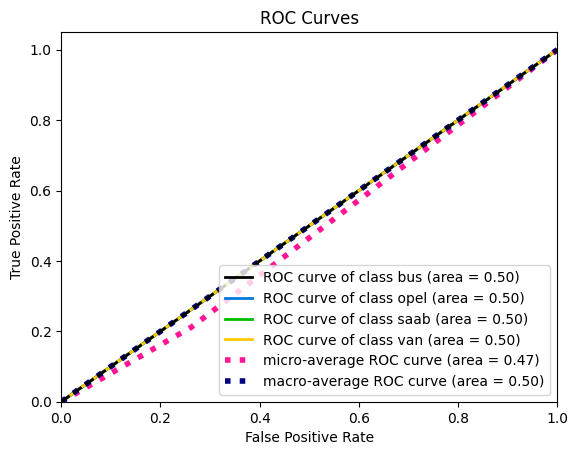

In [214]:

param_grid = {"max_depth": range(3, 10)}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv=3)
grid_search.fit(X_train_pca, y_train)
grid_search.predict_proba(X_test)
print(grid_search.best_params_)
plot_roc(y_test, grid_search.predict_proba(X_test))
# YOUR CODE HERE

In [215]:
dt_params = grid_search.best_params_

In [216]:
y_pred = grid_search.best_estimator_.predict(X_test)
print(f1_score(y_test, y_pred, average="macro"),  accuracy_score(y_test, y_pred))

0.0875 0.21212121212121213


#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [217]:
for i in range(2, 101, 5):
    model = LogisticRegression(multi_class="multinomial", solver="saga", tol=1e-3, **{key: val for key, val in lr_params.items()})
    bagging = BaggingClassifier(model, i)
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning)
        bagging.fit(X_train_pca, y_train)
    y_pred = bagging.predict(X_test_pca)
    print(i, f1_score(y_test, y_pred, average="macro"),  accuracy_score(y_test, y_pred))

2 0.3604027417857205 0.367003367003367
7 0.36729800215631725 0.37373737373737376
12 0.3697225077081192 0.3771043771043771
17 0.3620849421408486 0.367003367003367
22 0.3711142450926435 0.3771043771043771
27 0.3714722922123131 0.3771043771043771
32 0.3674967459412554 0.37373737373737376
37 0.36809233623682464 0.37373737373737376
42 0.37060233600336717 0.3771043771043771
47 0.37152325413150716 0.3771043771043771
52 0.3645208948048934 0.37037037037037035
57 0.3667282785895329 0.37373737373737376
62 0.3678751699101548 0.37373737373737376
67 0.36774670125650627 0.37373737373737376
72 0.3735772734469429 0.38047138047138046
77 0.368092323376322 0.37373737373737376
82 0.36695431216149116 0.37373737373737376
87 0.3676883563730608 0.37373737373737376
92 0.3708373387139084 0.3771043771043771
97 0.3750946827029357 0.38047138047138046


In [218]:
for i in range(1, 101, 5):
    model = DecisionTreeClassifier(**{key: val for key, val in dt_params.items()})
    bagging = BaggingClassifier(model, i)
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning)
        bagging.fit(X_train_pca, y_train)
    y_pred = bagging.predict(X_test_pca)
    print(i, f1_score(y_test, y_pred, average="macro"),  accuracy_score(y_test, y_pred))

1 0.3154398933686685 0.32323232323232326
6 0.34746020862636556 0.3501683501683502
11 0.36064622314622313 0.367003367003367
16 0.3720148393074172 0.38047138047138046
21 0.3938677906108197 0.39730639730639733
26 0.37992097460482516 0.3838383838383838
31 0.39340107370797905 0.39730639730639733
36 0.3939837896881241 0.4006734006734007
41 0.3986766328783579 0.40404040404040403
46 0.38391660593514 0.39057239057239057
51 0.38084504812916353 0.3872053872053872
56 0.3987182934969416 0.40404040404040403
61 0.39353028136060964 0.39730639730639733
66 0.38724077880227403 0.39057239057239057
71 0.3871767113599963 0.3939393939393939
76 0.3986117632927833 0.40404040404040403
81 0.39245411554862736 0.39730639730639733
86 0.4089511446790194 0.41414141414141414
91 0.40157607436069637 0.4074074074074074
96 0.3933055148507907 0.39730639730639733


#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [224]:
f1_scores=[]
acc_scores = []
for i in range(1, 101, 5):
    model = RandomForestClassifier(n_estimators=i, **{key: val for key, val in dt_params.items()})
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    f1_scores.append(f1_score(y_test, y_pred, average="macro"))
    acc_scores.append(accuracy_score(y_test, y_pred))
    #print(i, f1_score(y_test, y_pred, average="macro"),  accuracy_score(y_test, y_pred))

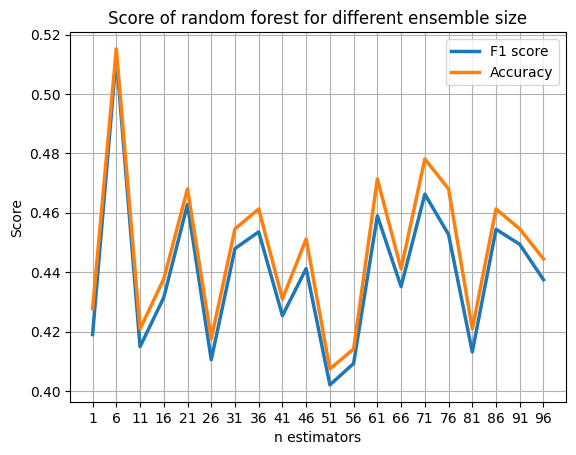

In [227]:
plt.title("Score of random forest for different ensemble size")
plt.plot(range(1, 101, 5), f1_scores, label="F1 score", linewidth=2.5)
plt.plot(range(1, 101, 5), acc_scores, label="Accuracy", linewidth=2.5)
plt.xlabel("n estimators")
plt.xticks(range(1, 101, 5))
plt.ylabel("Score")
plt.grid()
plt.legend()
plt.show()

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [220]:
# YOUR CODE HERE

#### 2.9. Boosting
Your goal is to build a boosting ensemble using xgboost, CatBoost or lightgbm package.
Please, do not use the sklearn API for these models.

Find optimal number of decision trees in the boosting ensembe using grid search or other methods.
Please, explain your answer.

In [221]:
# YOUR CODE HERE